<a href="https://colab.research.google.com/github/felipe-gm/ifusp_fiscomp_1/blob/master/2020_03_25/Questao3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related third party imports

In [0]:
from numpy import array, arange
import matplotlib.pyplot as plt

Variaveis globais

In [0]:
a = .0        # Inicio do intervalo da variavel independente 
b = 20.       # Final do intervalo da variavel independente
N = 1e5       # Numero de passos da integracao numerica
h = (b-a)/N   # Tamnho de um passo de integracao

t_rk4 = arange(a,b,h)

Constantes

In [0]:
OMEGA, MU_LIST = 1, [1, 2, 4]

In [0]:
def passo_rk4(f,r,t,h):
    """Calcula um passo no metodo de RK4

    Positional arguments:
    f -- equacao de difereca multidimensional (type function)
    r -- vetor vetor de posicao no espaco de estados (type numpy.ndarray)
    t -- tempo (type float)
    h -- tamnho de um passo de integracao (type float)
    """
    k1 = h*f(r,t)
    k2 = h*f(r+.5*k1,t+.5*h)
    k3 = h*f(r+.5*k2,t+.5*h)
    k4 = h*f(r+k3,t+h)
    return (k1+2.*(k2+k3)+k4)/6.

# Equacao geral do oscilador harmonico simples ($x_0=0$)

In [0]:
def f1(r,t):
    """Equacao geral do oscilador harmonico simples:

        d2x/dt2 = -OMEGA**2 * x

    em que SIGMA eh constante.

    Positional arguments:
    r -- vetor de posicao no espaco de estados (type numpy.ndarray)
    t -- tempo (type float)
    """
    x, y= r[0], r[1]
    fx, fy = y, -(OMEGA**2) * x
    return array([fx,fy], float)

In [0]:
x1_rk4, y1_rk4 = [], []

Condicoes iniciais (e.g.: r(a))

In [0]:
ra = array([1.,.0],float)
r = ra

Loop da integracao numerica

In [0]:
for t in t_rk4:
    x1_rk4.append(r[0])
    y1_rk4.append(r[1])
    r += passo_rk4(f1,r,t,h)

Plot

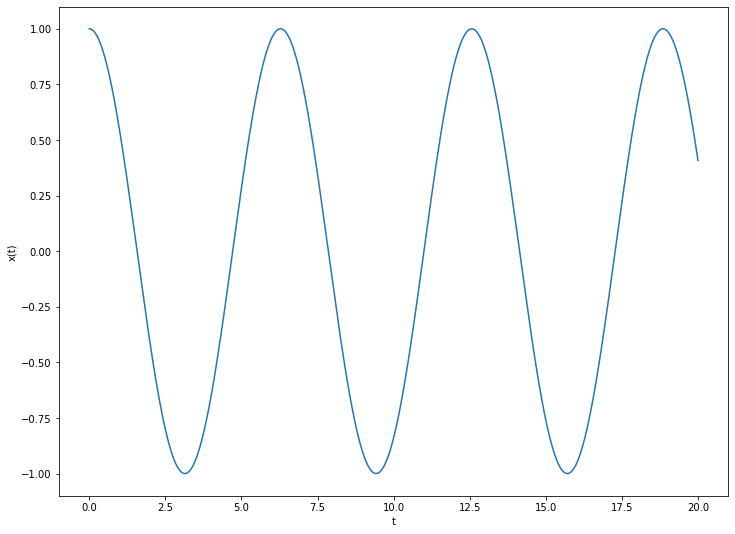

In [9]:
plt.figure(figsize=(12,9))
plt.plot(t_rk4, x1_rk4)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

# $x_0=2$

In [0]:
x2_rk4, y2_rk4 = [], []

Condicoes iniciais (e.g.: r(a))

In [0]:
ra = array([2.,.0],float)
r = ra

Loop da integracao numerica

In [0]:
for t in t_rk4:
    x2_rk4.append(r[0])
    y2_rk4.append(r[1])
    r += passo_rk4(f1,r,t,h)

Plot

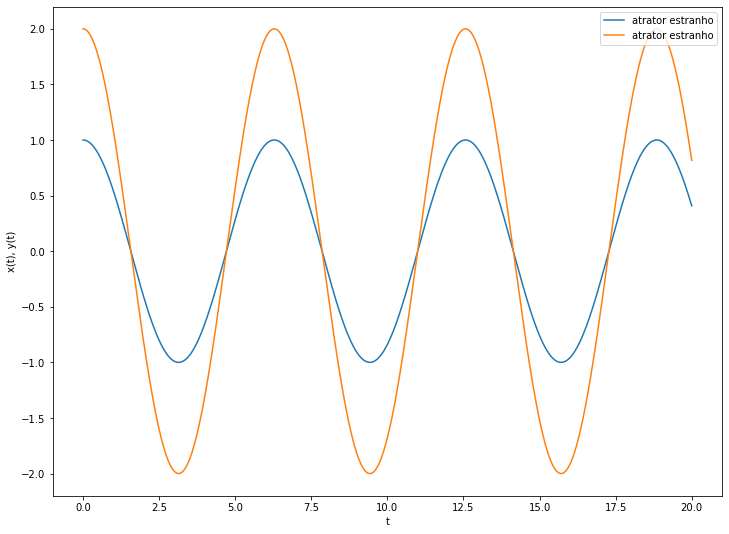

In [13]:
plt.figure(figsize=(12,9))
plt.plot(t_rk4, x1_rk4, label="atrator estranho")
plt.plot(t_rk4, x2_rk4, label="atrator estranho")
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.legend(loc='upper right')
plt.show()

# Oscilador anarmonico

In [0]:
def f3(r,t):
    """Equacao do oscilador anarmonico definido pela equacao:

        d2x/dt2 = -OMEGA**2 * x**3

    em que OMEGA eh constante.

    Positional arguments:
    r -- vetor de posicao no espaco de estados (type numpy.ndarray)
    t -- tempo (type float)
    """
    x, y= r[0], r[1]
    fx, fy = y, -(OMEGA**2) * x**3
    return array([fx,fy], float)

In [0]:
x3_1_rk4, y3_1_rk4, x3_2_rk4, y3_2_rk4 = [], [], [], []

Condicoes iniciais (e.g.: r(a))

In [0]:
ra1, ra2 = array([1.,.0],float), array([2.,.0],float)
r1, r2 = ra1, ra2

Loop da integracao numerica

In [0]:
for t in t_rk4:
    x3_1_rk4.append(r1[0])
    y3_1_rk4.append(r1[1])
    x3_2_rk4.append(r2[0])
    y3_2_rk4.append(r2[1])
    r1 += passo_rk4(f3,r1,t,h)
    r2 += passo_rk4(f3,r2,t,h)

Plot

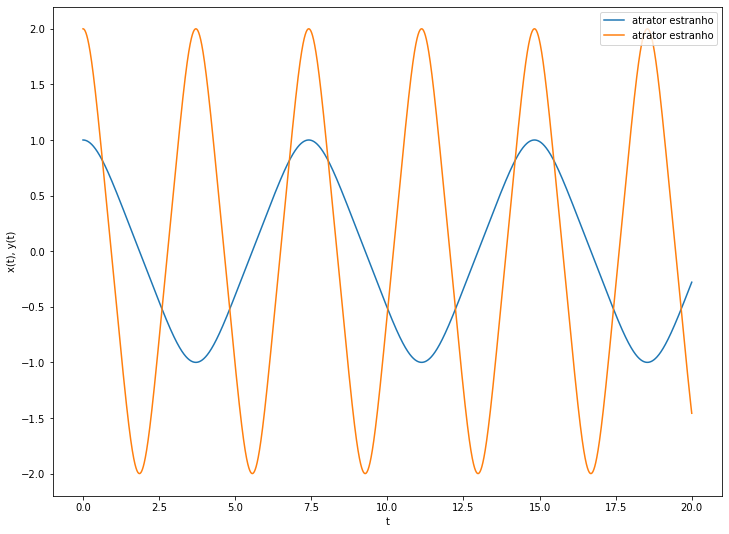

In [18]:
plt.figure(figsize=(12,9))
plt.plot(t_rk4, x3_1_rk4, label="atrator estranho")
plt.plot(t_rk4, x3_2_rk4, label="atrator estranho")
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.legend(loc='upper right')
plt.show()

# Espaco de fase

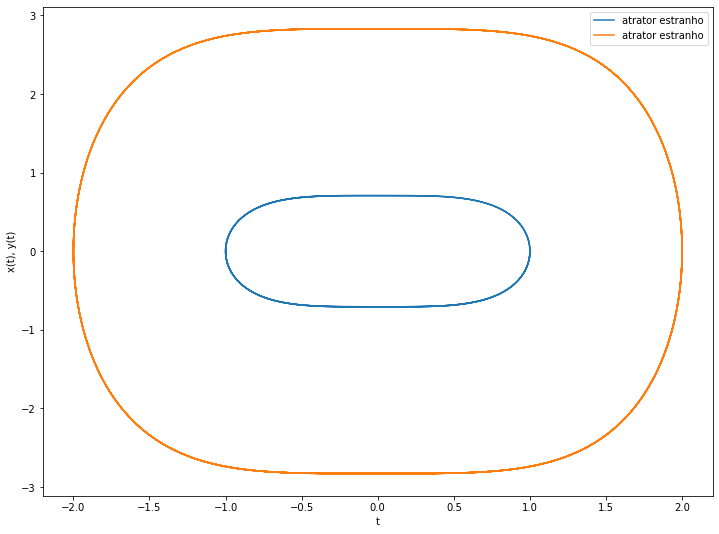

In [19]:
plt.figure(figsize=(12,9))
plt.plot(x3_1_rk4, y3_1_rk4, label="atrator estranho")
plt.plot(x3_2_rk4, y3_2_rk4, label="atrator estranho")
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.legend(loc='upper right')
plt.show()

# Oscilador de van der Pol

In [0]:
def f5(r,t):
    """Equacao do oscilador anarmonico definido pela equacao:

        d2x/dt2 = mu*(1-x**2)*dx/dt - OMEGA**2 * x

    em que OMEGA e mu sao constantes definidas fora do escopo da funcao.

    Positional arguments:
    r -- vetor de posicao no espaco de estados (type numpy.ndarray)
    t -- tempo (type float)
    """
    x, y= r[0], r[1]
    fx, fy = y, mu*(1-x**2)*y - OMEGA**2 * x
    return array([fx,fy], float)

In [0]:
x5_rk4, y5_rk4 = {mu:[] for mu in MU_LIST}, {mu:[] for mu in MU_LIST}

Condicoes iniciais (e.g.: r(a))

In [0]:
ra = array([1.,.0],float)
r = ra

Loop da integracao numerica

In [0]:
for mu in MU_LIST:
    for t in t_rk4:
        x5_rk4[mu].append(r[0])
        y5_rk4[mu].append(r[1])
        r += passo_rk4(f5,r,t,h)

Plot

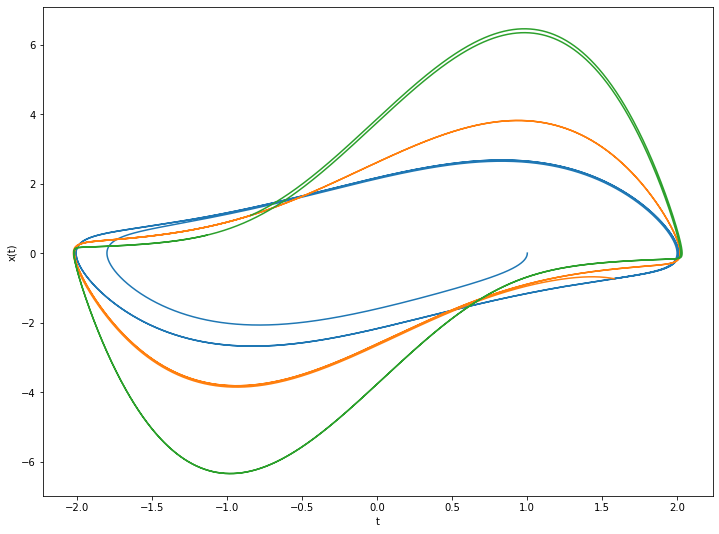

In [24]:
plt.figure(figsize=(12,9))
for mu in MU_LIST:
    plt.plot(x5_rk4[mu], y5_rk4[mu])
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()